<center> <h1> Driving while Distracted, Drinking, Speeding... Killing? </h1>
<h2> Bad Drivers of 'Murica </h2>  </center>
<b>Vashti Marin</b> <br>
Marquette University <br>
December 2018 <br> <br> 
<b>DataSet Name: </b>FiveThirtyEight Bad Drivers Dataset <br>
<b>Collected from: </b>Kaggle.com at https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset <br>
<b>Objective:</b> Analyze factors of Car Fatalities <br>
<b>Data Set Description:</b> Number of fatalities per billion miles is collected for each state. Percentage of drivers that were involved in fatal accidents while being alcohol impaired, speeding and not distracted are included by state. Percentage of drivers that were not involved in a previous accident, car insurance premiums (in dollars) and loss incurred by insurance companies per insured driver (in dollars) are also included by state. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

df = pd.read_csv("bad-drivers.csv")

In [2]:
df.head(10)

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63
5,Colorado,13.6,37,28,79,95,835.50,139.91
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
7,Delaware,16.2,38,30,87,99,1137.87,151.48
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
9,Florida,17.9,21,29,92,94,1160.13,144.18


<img src ="wrangle.jpg" width = "400">

In [3]:
#Wrangling and Cleaning data
df.dropna()

,State,Number of drivers involved in fatal collisions per billion miles,Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding,Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired,Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted,Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents,Car Insurance Premiums ($),Losses incurred by insurance companies for collisions per insured driver ($)
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63
5,Colorado,13.6,37,28,79,95,835.50,139.91
6,Connecticut,10.8,46,36,87,82,1068.73,167.02
7,Delaware,16.2,38,30,87,99,1137.87,151.48
8,District of Columbia,5.9,34,27,100,100,1273.89,136.05
9,Florida,17.9,21,29,92,94,1160.13,144.18


In [4]:
#check for null entries
df.isnull().values.any()

False

In [5]:
#check for duplicates
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

In [6]:
df.shape

(51, 8)

In [7]:
#shorten column names
df.columns=["State","Accidents","Speeding","Drinking","NotDistracted","NoPrevious","Premiums","Loss"]
df.head()

,State,Accidents,Speeding,Drinking,NotDistracted,NoPrevious,Premiums,Loss
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


In [8]:
#add columns with more covenient data
newvalues= 100- df['NotDistracted']
df['Distracted'] = newvalues
newvalues1= 100- df['NoPrevious']
df['Previous'] = newvalues1
df.head()

,State,Accidents,Speeding,Drinking,NotDistracted,NoPrevious,Premiums,Loss,Distracted,Previous
0,Alabama,18.8,39,30,96,80,784.55,145.08,4,20
1,Alaska,18.1,41,25,90,94,1053.48,133.93,10,6
2,Arizona,18.6,35,28,84,96,899.47,110.35,16,4
3,Arkansas,22.4,18,26,94,95,827.34,142.39,6,5
4,California,12.0,35,28,91,89,878.41,165.63,9,11


In [9]:
#drop unnecessary columns
df= df.drop(columns = ['NotDistracted', 'NoPrevious'])



In [10]:
#Let's see what our data looks like now that it's clean
df.head()

,State,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
0,Alabama,18.8,39,30,784.55,145.08,4,20
1,Alaska,18.1,41,25,1053.48,133.93,10,6
2,Arizona,18.6,35,28,899.47,110.35,16,4
3,Arkansas,22.4,18,26,827.34,142.39,6,5
4,California,12.0,35,28,878.41,165.63,9,11


<img src ="looksgood.png" width = "400">

In [11]:
#Now we can start our analysis. Let's describe the data as it is.
df.describe()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,886.957647,134.493137,14.078431,11.27451
std,4.122002,9.633438,5.132213,178.296285,24.835922,15.158949,6.96011
min,5.900000,13.000000,16.000000,641.960000,82.750000,0.000000,0.00000
25%,12.750000,23.000000,28.000000,768.430000,114.645000,5.000000,5.00000
50%,15.600000,34.000000,30.000000,858.970000,136.050000,12.000000,12.00000
75%,18.500000,38.000000,33.000000,1007.945000,151.870000,17.000000,16.50000
max,23.900000,54.000000,44.000000,1301.520000,194.780000,90.000000,24.00000


In [12]:
#Now let's look for any possible correlations
df.corr()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
Accidents,1.000000,-0.029080,0.199426,-0.199702,-0.036011,-0.009782,0.017942
Speeding,-0.029080,1.000000,0.286244,0.042541,-0.061241,-0.131738,-0.014066
Drinking,0.199426,0.286244,1.000000,-0.017451,-0.083916,-0.043380,0.245455
Premiums,-0.199702,0.042541,-0.017451,1.000000,0.623116,-0.019578,-0.075533
Loss,-0.036011,-0.061241,-0.083916,0.623116,1.000000,0.058467,-0.042770
Distracted,-0.009782,-0.131738,-0.043380,-0.019578,0.058467,1.000000,-0.195265
Previous,0.017942,-0.014066,0.245455,-0.075533,-0.042770,-0.195265,1.000000


In [13]:
#Let's split our data into our train and test sets
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

In [14]:
df_copy = train_set.copy()

In [15]:
df_copy.describe()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,16.137143,32.485714,30.714286,867.832286,133.073429,11.228571,11.228571
std,3.683515,9.284305,5.327903,167.560938,25.406665,8.250083,6.444723
min,8.200000,13.000000,16.000000,649.060000,85.150000,1.000000,1.000000
25%,13.850000,24.500000,28.000000,739.410000,112.410000,5.000000,5.500000
50%,16.100000,34.000000,30.000000,809.380000,133.800000,8.000000,12.000000
75%,18.400000,38.500000,33.000000,1001.875000,146.830000,16.000000,16.000000
max,23.900000,54.000000,44.000000,1281.550000,194.780000,33.000000,23.000000


In [16]:
df_copy.corr()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
Accidents,1.000000,0.129148,0.239293,-0.006437,0.053533,-0.153399,-0.034315
Speeding,0.129148,1.000000,0.112887,0.114784,0.022726,0.214691,-0.103661
Drinking,0.239293,0.112887,1.000000,0.008297,-0.089666,-0.075420,0.294047
Premiums,-0.006437,0.114784,0.008297,1.000000,0.661965,0.233109,-0.301541
Loss,0.053533,0.022726,-0.089666,0.661965,1.000000,0.186552,-0.180949
Distracted,-0.153399,0.214691,-0.075420,0.233109,0.186552,1.000000,-0.267639
Previous,-0.034315,-0.103661,0.294047,-0.301541,-0.180949,-0.267639,1.000000


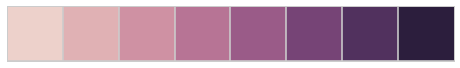

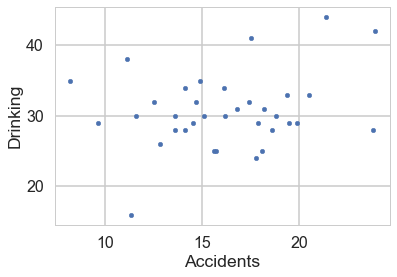

In [99]:
sns.palplot(sns.cubehelix_palette(8))
df_copy.plot.scatter(x="Accidents", y="Drinking")

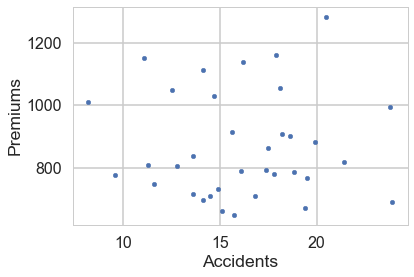

In [100]:
df_copy.plot.scatter(x="Accidents", y="Premiums")

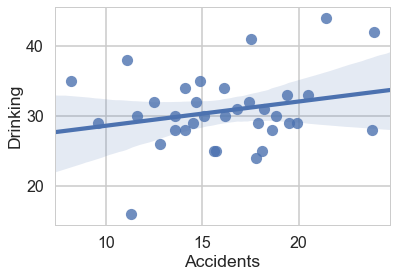

In [101]:
sns.regplot(x="Accidents", y="Drinking", data=df_copy)

In [20]:
test_set_full = test_set.copy()

test_set = test_set.drop(["Accidents"], axis=1)

In [21]:
import statsmodels.formula.api as smf   

In [22]:
formula = 'Accidents~ %s'%(" + ".join(df_copy.columns.values[2:]))
formula


'Accidents~ Speeding + Drinking + Premiums + Loss + Distracted + Previous'

In [23]:
lin_reg = smf.ols(formula, data=df_copy).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Accidents   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                    0.7070
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.647
Time:                        02:24:51   Log-Likelihood:                -92.322
No. Observations:                  35   AIC:                             198.6
Df Residuals:                      28   BIC:                             209.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9523      5.811      1.713      0.098      -1.950      21.855
Speeding       0.0547      0.073      0.752      0.458      -0.094       0.204
Drinking       0.1900      0.131      1.454      0.157      -0.078       0.458
Premiums      -0.0032      0.005     -0.589      0.561      -0.014       0.008
Loss           0.0261      0.035      0.755      0.456      -0.045       0.097
Distracted    -0.0923      0.084     -1.093      0.284      -0.265       0.081
Previous      -0.0958      0.114     -0.840      0.408      -0.329       0.138
==============================================================================
Omnibus:                        0.453   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.577
Skew:                           0.040   Prob(JB):                        0.749
Kurtosis:                       2.376   Cond. No.                     8.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
lin_reg.params

Intercept     9.952266
Speeding      0.054667
Drinking      0.189972
Premiums     -0.003209
Loss          0.026083
Distracted   -0.092263
Previous     -0.095796
dtype: float64

In [25]:
lin_reg.conf_int()

,0,1
Intercept,-1.950008,21.854540
Speeding,-0.094210,0.203544
Drinking,-0.077738,0.457683
Premiums,-0.014372,0.007953
Loss,-0.044655,0.096821
Distracted,-0.265176,0.080650
Previous,-0.329271,0.137680


In [26]:
Y = df_copy["Premiums"]
X = df_copy[["Accidents","Loss"]]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Premiums   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     722.9
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           5.64e-28
Time:                        02:24:51   Log-Likelihood:                -220.55
No. Observations:                  35   AIC:                             445.1
Df Residuals:                      33   BIC:                             448.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Accidents      5.8760      5.019      1.171      0.2

In [27]:
test_set_full.describe()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
count,16.000000,16.000000,16.00000,16.000000,16.00000,16.00000,16.000000
mean,15.031250,30.062500,30.62500,928.794375,137.59875,20.31250,11.375000
std,4.998629,10.471986,4.84252,199.008255,24.04071,23.47969,8.204673
min,5.900000,15.000000,23.00000,641.960000,82.75000,0.00000,0.000000
25%,11.800000,19.000000,27.00000,821.282500,119.63500,8.25000,3.500000
50%,13.300000,34.500000,29.00000,875.460000,140.77000,13.00000,12.500000
75%,18.650000,36.500000,33.25000,1020.745000,156.03500,19.00000,18.250000
max,23.900000,46.000000,41.00000,1301.520000,167.02000,90.00000,24.000000


In [28]:
test_set_full.corr()

,Accidents,Speeding,Drinking,Premiums,Loss,Distracted,Previous
Accidents,1.000000,-0.302262,0.138224,-0.433137,-0.166272,0.135328,0.089750
Speeding,-0.302262,1.000000,0.677535,-0.025457,-0.210380,-0.346868,0.130064
Drinking,0.138224,0.677535,1.000000,-0.068520,-0.067400,-0.027631,0.159824
Premiums,-0.433137,-0.025457,-0.068520,1.000000,0.545093,-0.280824,0.256683
Loss,-0.166272,-0.210380,-0.067400,0.545093,1.000000,-0.080344,0.213076
Distracted,0.135328,-0.346868,-0.027631,-0.280824,-0.080344,1.000000,-0.194098
Previous,0.089750,0.130064,0.159824,0.256683,0.213076,-0.194098,1.000000


In [29]:
formula2 = 'Accidents~ %s'%(" + ".join(test_set_full.columns.values[2:]))
formula2



'Accidents~ Speeding + Drinking + Premiums + Loss + Distracted + Previous'

In [30]:
lin_reg2 = smf.ols(formula2, data=test_set_full).fit()
lin_reg2.summary()

/Users/vashtimarin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Accidents   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     2.051
Date:                Sat, 15 Dec 2018   Prob (F-statistic):              0.160
Time:                        02:24:51   Log-Likelihood:                -41.040
No. Observations:                  16   AIC:                             96.08
Df Residuals:                       9   BIC:                             101.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.8729     10.259      2.035      0.072      -2.336      44.081
Speeding      -0.4401      0.165     -2.673      0.025      -0.812      -0.068
Drinking       0.7061      0.327      2.159      0.059      -0.034       1.446
Premiums      -0.0118      0.007     -1.719      0.120      -0.027       0.004
Loss          -0.0253      0.056     -0.447      0.665      -0.153       0.103
Distracted    -0.0573      0.055     -1.050      0.321      -0.181       0.066
Previous       0.1184      0.141      0.840      0.423      -0.200       0.437
==============================================================================
Omnibus:                        0.671   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.715   Jarque-Bera (JB):                0.639
Skew:                          -0.396   Prob(JB):                        0.727
Kurtosis:                       2.424   Cond. No.                     9.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
lin_reg2.params

Intercept     20.872936
Speeding      -0.440051
Drinking       0.706061
Premiums      -0.011781
Loss          -0.025264
Distracted    -0.057332
Previous       0.118401
dtype: float64

In [32]:
lin_reg2.conf_int()

,0,1
Intercept,-2.335607,44.081479
Speeding,-0.812408,-0.067694
Drinking,-0.033854,1.445976
Premiums,-0.027286,0.003724
Loss,-0.153044,0.102516
Distracted,-0.180815,0.066152
Previous,-0.200367,0.437169


Right about now is where we start feeling like...
<img src ="giphy.gif" width = "400"><img src ="giphy2.gif" width = "400">
So why not keep going!

In [33]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept     11.902274
Speeding       0.148877
Drinking       0.267711
Premiums       0.011163
Loss           0.070738
Distracted     0.172913
Previous       0.233476
dtype: float64

In [34]:
err_series2 = lin_reg2.params - lin_reg2.conf_int()[0]
err_series2

Intercept     23.208543
Speeding       0.372357
Drinking       0.739915
Premiums       0.015505
Loss           0.127780
Distracted     0.123483
Previous       0.318768
dtype: float64

In [35]:
coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,0.054667,0.148877,Speeding
1,0.189972,0.267711,Drinking
2,-0.003209,0.011163,Premiums
3,0.026083,0.070738,Loss
4,-0.092263,0.172913,Distracted
5,-0.095796,0.233476,Previous


In [36]:
coef_df2 = pd.DataFrame({'coef': lin_reg2.params.values[1:],
                        'err': err_series2.values[1:],
                        'varname': err_series2.index.values[1:]
                       })
coef_df2

,coef,err,varname
0,-0.440051,0.372357,Speeding
1,0.706061,0.739915,Drinking
2,-0.011781,0.015505,Premiums
3,-0.025264,0.127780,Loss
4,-0.057332,0.123483,Distracted
5,0.118401,0.318768,Previous


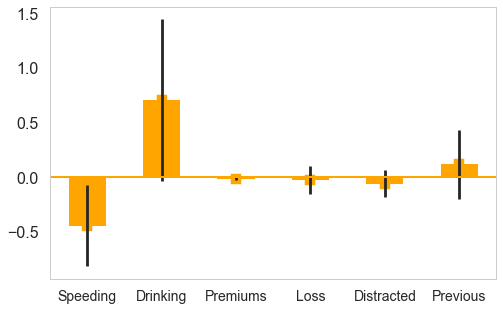

In [98]:
#basic plot
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 5))
coef_df2.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='orange', 
             yerr='err', legend=False, grid=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df2.shape[0]), 
           marker='s', s=120, 
           y=coef_df2['coef'], color='orange')
ax.axhline(y=0, linestyle='-', color='orange', linewidth=2)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Speeding', 'Drinking', 'Premiums', 'Loss', 'Distracted', 'Previous'], 
                       rotation=0, fontsize=14)

In [56]:
Y = test_set_full["Premiums"]
X = test_set_full[["Accidents","Loss"]]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Premiums   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     217.4
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.87e-11
Time:                        02:44:28   Log-Likelihood:                -104.64
No. Observations:                  16   AIC:                             213.3
Df Residuals:                      14   BIC:                             214.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Accidents     -4.4518      7.716     -0.577      0.5

/Users/vashtimarin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [57]:
Y = test_set_full["Accidents"]
X = test_set_full[["Speeding","Drinking","Distracted"]]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Accidents   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     60.96
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           6.50e-08
Time:                        02:45:47   Log-Likelihood:                -45.154
No. Observations:                  16   AIC:                             96.31
Df Residuals:                      13   BIC:                             98.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Speeding      -0.4156      0.164     -2.534      0.0

/Users/vashtimarin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


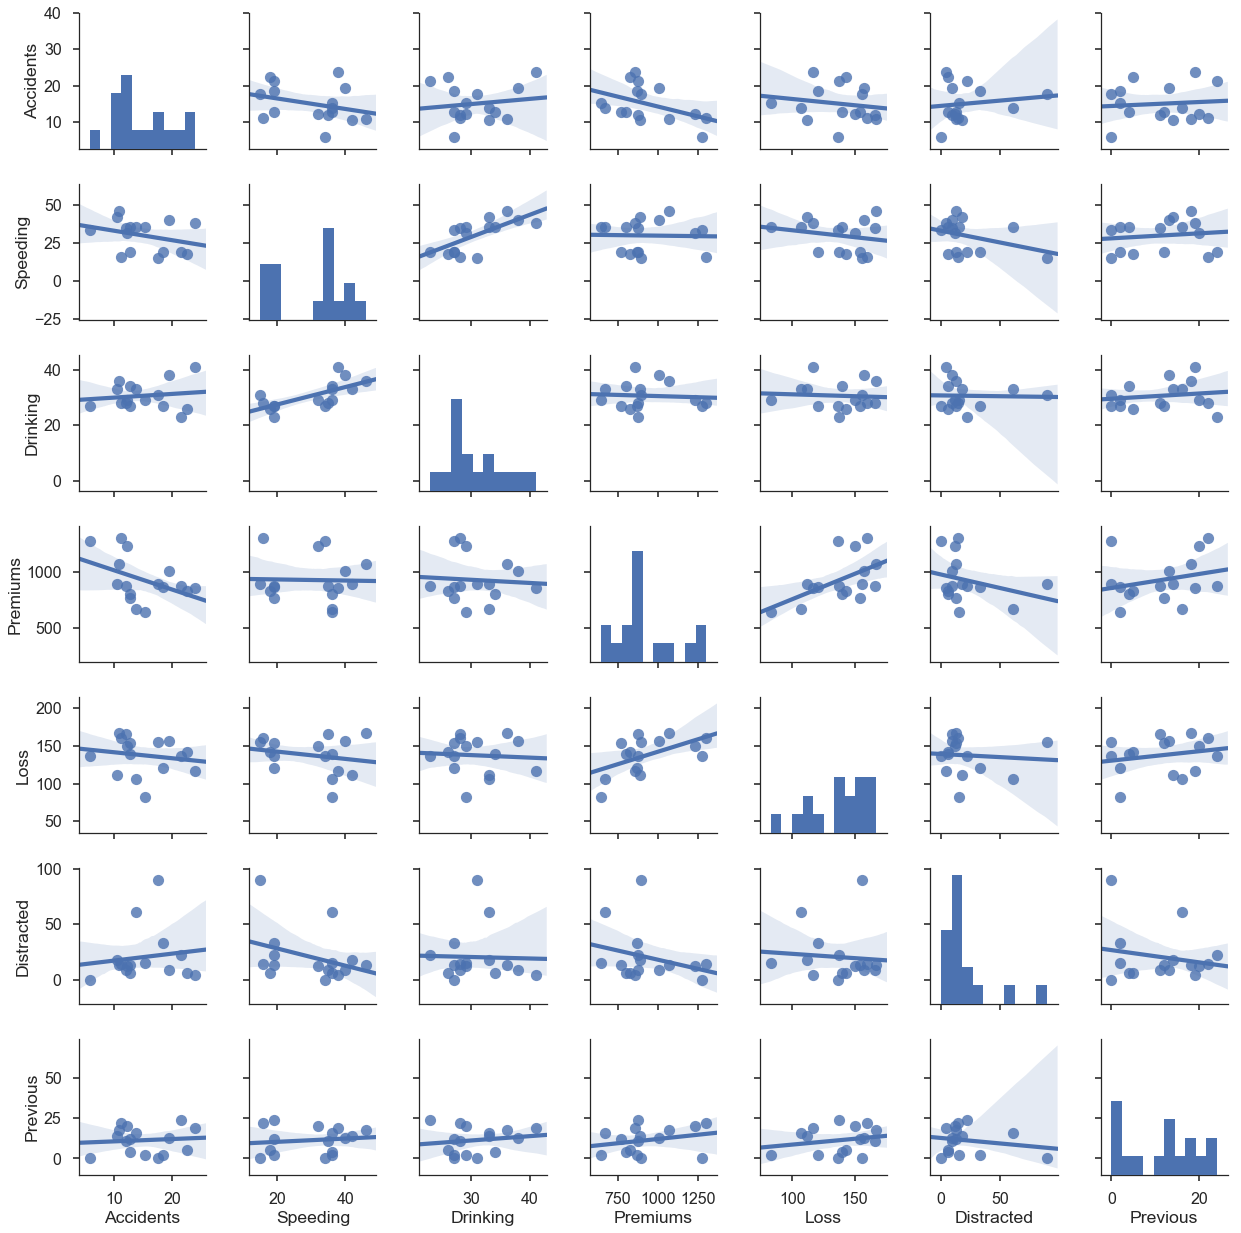

In [96]:
sns.set_style("ticks")
sns.pairplot(test_set_full, kind="reg")
plt.show()

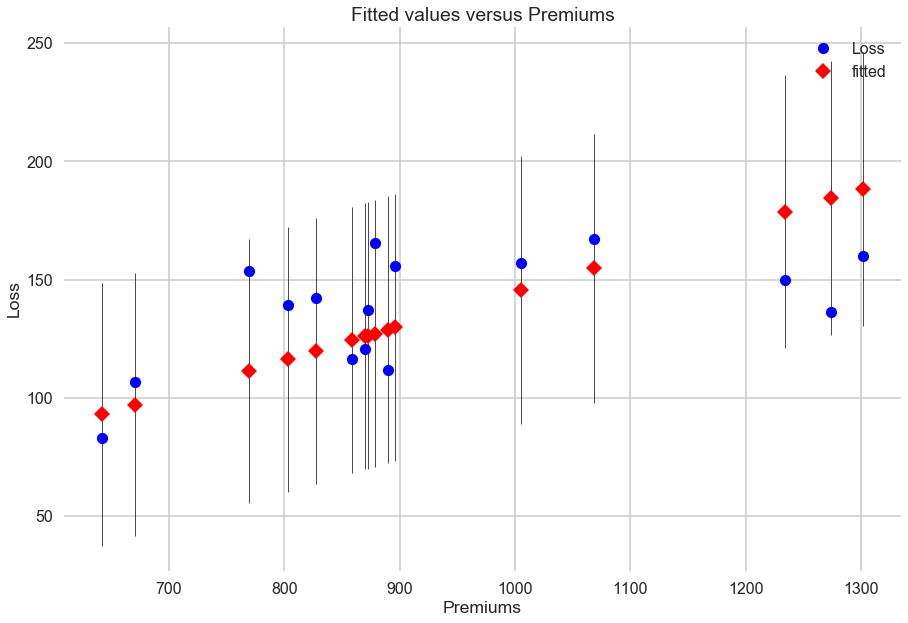

In [105]:

X = test_set_full["Premiums"]
Y = test_set_full["Loss"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)
sns.despine(left=True, bottom=True)
sns.set_context("paper")

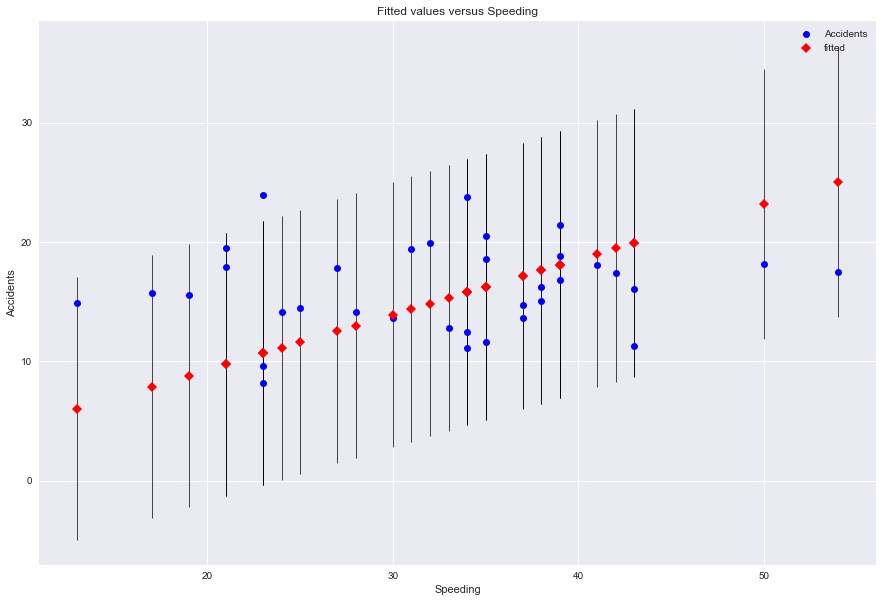

In [90]:
X = df_copy["Speeding"]
Y = df_copy["Accidents"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

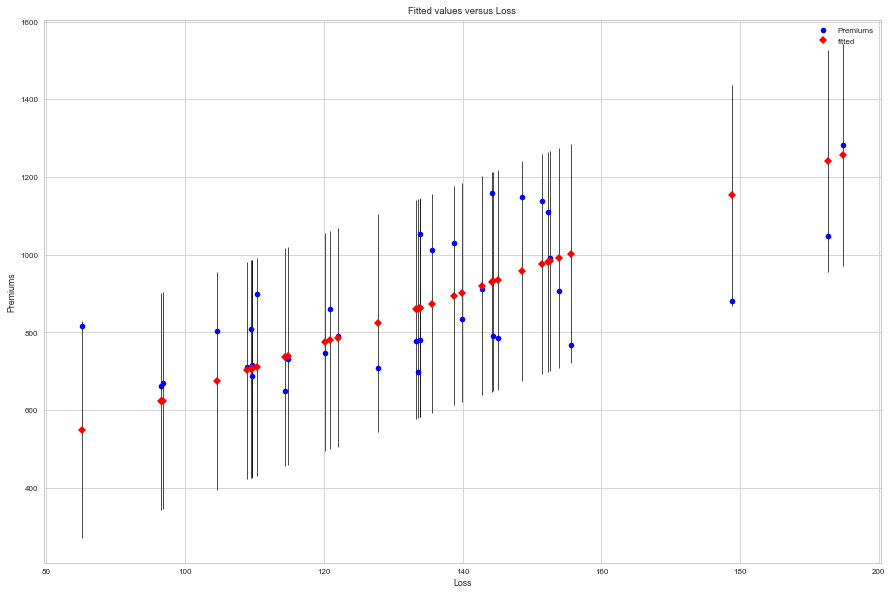

In [95]:
X = df_copy["Loss"]
Y = df_copy["Premiums"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)
sns.set_context("poster")

In [103]:
comp= df_copy.drop(columns = ["Accidents", "Loss", "Premiums", "State"])

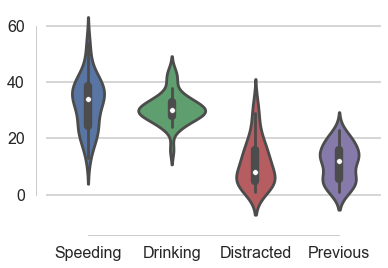

In [104]:
f, ax = plt.subplots()
sns.violinplot(data=comp)
sns.despine(offset=10, trim=True);